In [1]:
import objective
import GPy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from importlib import reload
reload(objective)

<module 'objective' from '/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/simulations/objective.py'>

In [3]:
def buildModel(o, kern, N=25, rs=3, alpha=1, variance=0):
    #x = o.sample_space(N)
    x = np.row_stack([np.random.rand(N)*(u-l) + l] for l, u in o.range).T
    y = o(x)
    y = (y - y.mean())/y.std()
    # x = (x - x.mean(0))/x.std(0)
    for i, (l, u) in enumerate(o.range):
        x[:, i] = alpha*(x[:, i] - l) / (u - l)
    
    params = []
    m = GPy.models.GPRegression(x, y[:,None], kern)
    m.likelihood.variance = variance
    m.likelihood.variance.fix()
    
    for _ in range(rs):
        m.randomize()
        m.optimize()
        params.append(m.kern.param_array)
        
    return m, params

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Schwefel(d=2)
1383.9934376802814
[1.64221366 0.20356842 0.20356872]
[0. 0. 0.]

KeyboardInterrupt caught, calling on_optimization_end() to round things up


KeyboardInterrupt: 

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


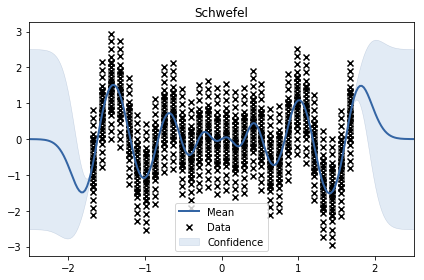

In [4]:

for Obj in objective.Objective.__subclasses__():
    
    o = Obj(2)
    
    x = o.sample_space(30)
    y = o(x)
    y = (y - y.mean())/y.std()
    x = (x - x.mean(0))/x.std(0)
    
    params = []
    m = GPy.models.GPRegression(x, y[:,None], GPy.kern.RBF(2, ARD=True))
    m.likelihood.variance = 0
    m.likelihood.variance.fix()
    
    for _ in range(5):
        m.randomize()
        m.optimize()
        params.append(m.kern.param_array)
        
    print(o)
    print(m.log_likelihood())
    print(np.mean(params, 0))
    print(np.std(params, 0))
    print()
    
    ax = m.plot(fixed_inputs=[(1, 0)])
    ax.set_title(Obj.__name__)
    

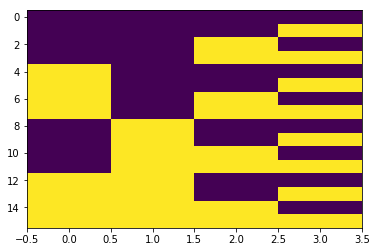

In [8]:
o = objective.Ackley(d=4)
plt.imshow(o.sample_space(2), aspect="auto")

# ackley 

In [35]:
o = objective.Ackley(d=2)
k = GPy.kern.RBF(2) + GPy.kern.RBF(2)
m, params = buildModel(o, k, N=1000, rs=1)

In [36]:
print(np.mean(params, 0))
print(np.std(params, 0))
print(m.log_likelihood())

[0.06060908 0.00252442 0.48154115 0.10206234]
[0. 0. 0. 0.]
-189.96021258678854


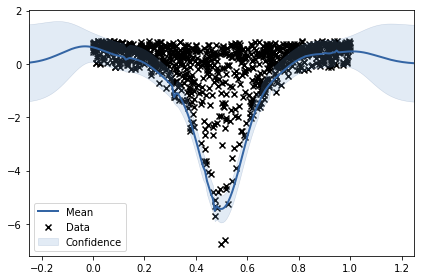

In [37]:
m.plot(fixed_inputs=[(1, .5)])

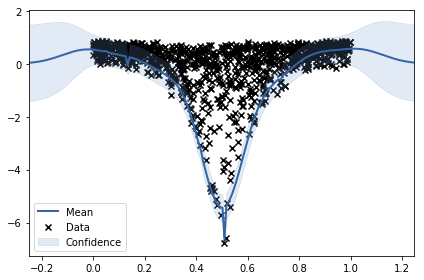

In [38]:
m.plot(fixed_inputs=[(0, .5)])

# dropwave 

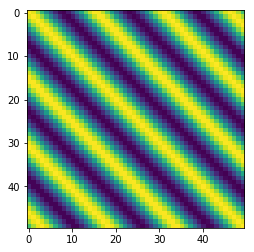

In [929]:
k = GPy.kern.Cosine(1)

plt.imshow(k.K(np.linspace(-10, 10)[:, None]))

In [917]:
import scipy.stats

In [922]:
scipy.stats.multivariate_normal(np.zeros(z.shape[0]), k.K(z)).shape

ValueError: the input matrix must be positive semidefinite

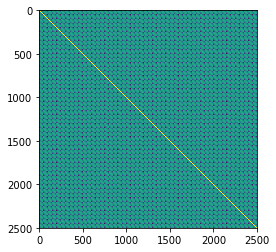

In [932]:
plt.imshow(np.eye(z.shape[0]) * .3 + k.K(z))

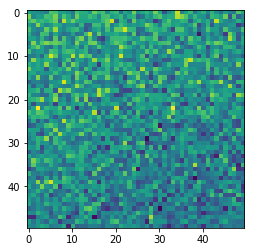

In [937]:
k = GPy.kern.Cosine(2, lengthscale=2)

mu, var = np.zeros(z.shape[0]), np.eye(z.shape[0]) * .3 + k.K(z)

plt.imshow(scipy.stats.multivariate_normal(mu, var).rvs().reshape(N, N))

In [912]:
o = objective.Dropwave(d=2)

k = GPy.kern.RBF(o.d) * GPy.kern.Cosine(o.d)
k = GPy.kern.Cosine(o.d)
# k = GPy.kern.PeriodicExponential(1) + GPy.kern.PeriodicExponential(1, active_dims=[1])
# k.rbf.lengthscale.set_prior(GPy.priors.Gamma(5, 5))
# k.rbf.lengthscale = .5
# k.rbf.lengthscale.fix()

# k = GPy.kern.RBF(2) + GPy.kern.RBF(2)
m, params = buildModel(o, k, N=20, rs=1, variance=.05)



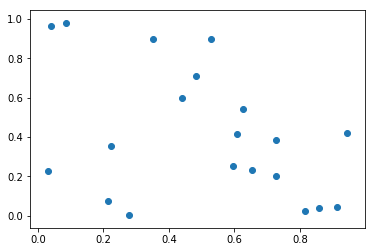

In [913]:
plt.scatter(m.X[:, 0], m.X[:,1])

In [914]:
m

GP_regression.,value,constraints,priors
Cosine.variance,3.326385205881942,+ve,
Cosine.lengthscale,3.7298968745825536,+ve,
Gaussian_noise.variance,0.05,+ve fixed,


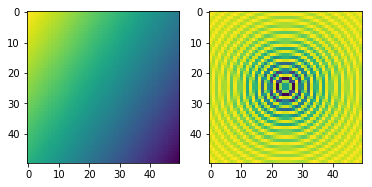

In [915]:
N = 50
x = o.sample_space(N)
z = x.copy()

for i, (l, u) in enumerate(o.range):
    z[:, i] = (z[:, i] - l) / (u - l)

mu, var = m.predict(z)

plt.subplot(121)
plt.imshow(mu.reshape(N, N))

plt.subplot(122)
plt.imshow(o(x).reshape(N, N))

In [837]:
print(np.mean(params, 0))
print(np.std(params, 0))

[1.32600718 0.14573074 0.83482773 0.1605775 ]
[0. 0. 0. 0.]


In [536]:
m.log_likelihood()

-639.6263905875962

In [537]:
o.optimum

[0, 0]

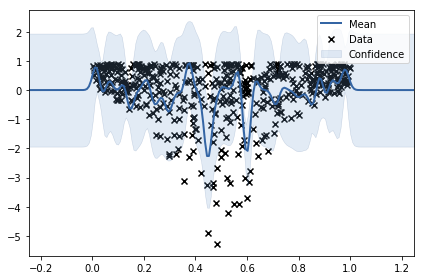

In [538]:
m.plot(fixed_inputs=[(1, .5)])

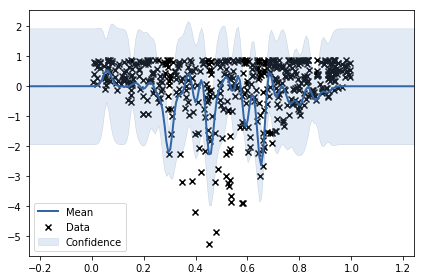

In [539]:
m.plot(fixed_inputs=[(0, .5)])

# Schwefel 

In [940]:
o = objective.Schwefel(d=2)
#k = GPy.kern.RBF(1, active_dims=[0]) + GPy.kern.RBF(1, active_dims=[1]) + GPy.kern.RBF(2, ARD=True)
# k = GPy.kern.RBF(2, ARD=True) + GPy.kern.RBF(2, ARD=True)
k = GPy.kern.RBF(1) + GPy.kern.RBF(1, active_dims=[1])

k.rbf.lengthscale.set_prior(GPy.priors.Gamma())

m, params = buildModel(o, k, N=50, rs=1)

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


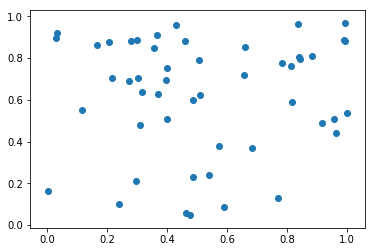

In [941]:
plt.scatter(m.X[:, 0], m.X[:, 1]);

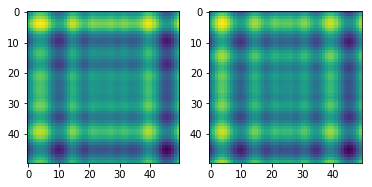

In [942]:
N = 50
x = o.sample_space(N)
z = x.copy()

for i, (l, u) in enumerate(o.range):
    z[:, i] = (z[:, i] - l) / (u - l)

mu, var = m.predict(z)

plt.subplot(121)
plt.imshow(mu.reshape(N, N))

plt.subplot(122)
plt.imshow(o(x).reshape(N, N))

In [943]:
print(np.mean(params, 0))
print(np.std(params, 0))
print(m.log_likelihood())

[0.52290828 0.03739805 0.8894613  0.05289228]
[0. 0. 0. 0.]
-22.325063612631208


In [944]:
print(np.mean(params, 0))
print(np.std(params, 0))
print(m.log_likelihood())

[0.52290828 0.03739805 0.8894613  0.05289228]
[0. 0. 0. 0.]
-22.325063612631208


 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


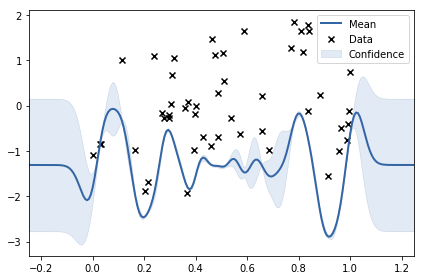

In [945]:
m.plot(fixed_inputs=[(1, .9)])

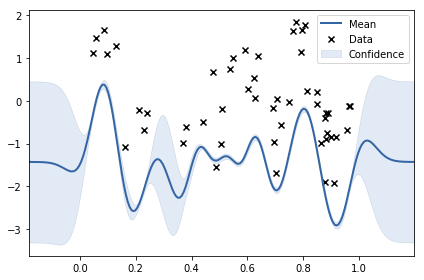

In [946]:
m.plot(fixed_inputs=[(0, 0.9)])

# griewank 

In [959]:
o = objective.Griewank(d=2)
# k = GPy.kern.RBF(1) + GPy.kern.RBF(1) + GPy.kern.Cosine(1) + GPy.kern.White(1)#+ GPy.kern.RBF(1)
k = GPy.kern.RBF(o.d) * GPy.kern.Cosine(o.d)

m, params = buildModel(o, k, N=100, rs=1, alpha=1000)

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


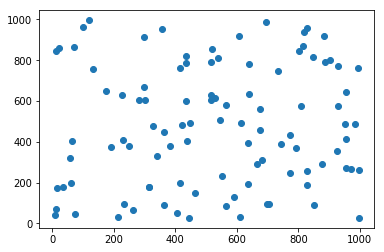

In [960]:
plt.scatter(m.X[:, 0], m.X[:, 1]);

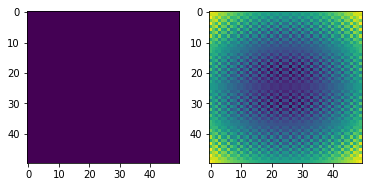

In [964]:
N = 50
x = o.sample_space(N)
z = x.copy()

for i, (l, u) in enumerate(o.range):
    z[:, i] = (z[:, i] - l) / (u - l)

mu, var = m.predict(z)

plt.subplot(121)
plt.imshow(mu.reshape(N, N))

plt.subplot(122)
plt.imshow(o(x).reshape(N, N))

In [963]:
print(np.mean(params, 0))
print(np.std(params, 0))

[1.2532732  0.41162582 0.79791061 0.47529565]
[0. 0. 0. 0.]


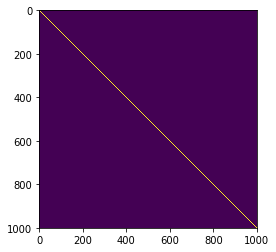

In [687]:
plt.imshow(k.white.K(z))

In [701]:
m.log_likelihood()

-35.45582693103637

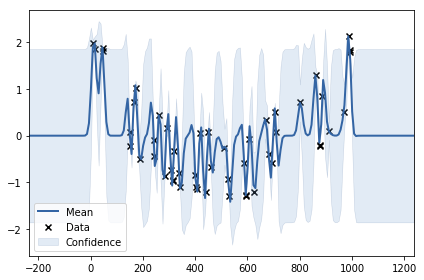

In [702]:
m.plot()

In [703]:
o.optimum

[0]

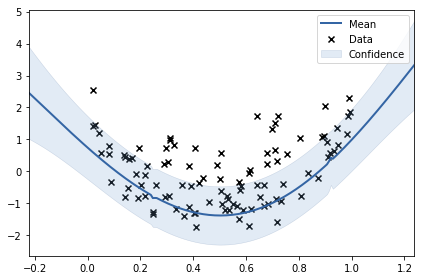

In [351]:
m.plot(fixed_inputs=[(1, .5)])

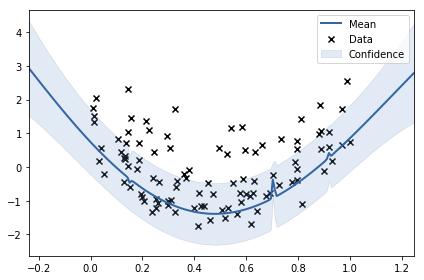

In [352]:
m.plot(fixed_inputs=[(0, .5)])

# Michalewicz 

In [148]:
o = objective.Michalewicz(d=2)
k = GPy.kern.RBF(2) #+ GPy.kern.RBF(2)
m, params = buildModel(o, k, N=1000, rs=1)

In [159]:
print(np.mean(params, 0))
print(np.std(params, 0))

[0.36189206 0.03873184]
[0. 0.]


In [150]:
m.log_likelihood()

912.1867249583175

In [155]:
o.optimum

[2.202906, 1.570796]

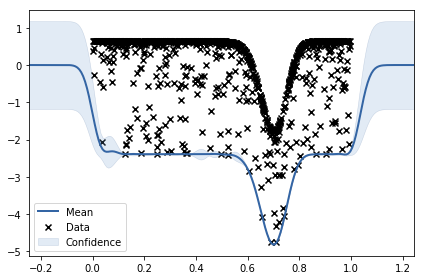

In [157]:
m.plot(fixed_inputs=[(1, .5)])

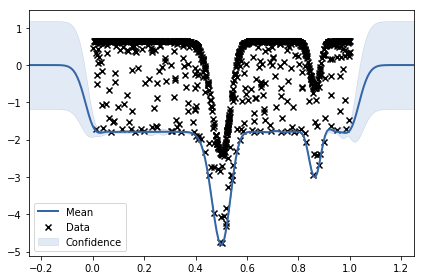

In [158]:
m.plot(fixed_inputs=[(0, .7)])

# Rastrigin 

In [32]:
o = objective.Rastrigin(d=2)
k = GPy.kern.RBF(o.d) + GPy.kern.RBF(o.d)
# k = GPy.kern.RBF(o.d) + GPy.kern.RBF(o.d) * GPy.kern.Cosine(o.d)
k = GPy.kern.RBF(1) + GPy.kern.RBF(1, active_dims=[1])

m, params = buildModel(o, k, N=50, rs=1)

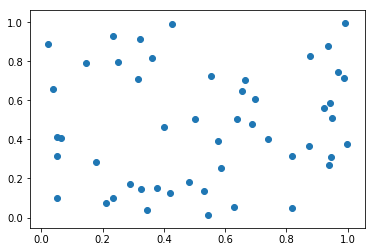

In [33]:
plt.scatter(m.X[:, 0], m.X[:, 1]);

In [42]:
o([0.16, 0.16])

array([9.3346641])

9.891179225372387

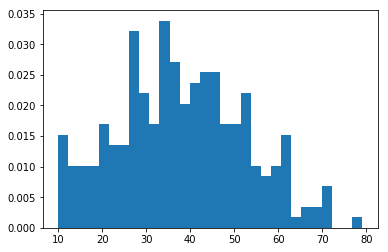

In [86]:
x = o.sample_space(32)

plt.hist(o(x), density=True, bins=30)

np.min(o(x))

Text(0.5, 0, 'f(X)')

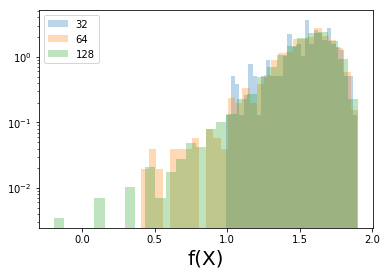

In [88]:
for i in range(5, 8):
    x = o.sample_space(2**i)
    
    plt.hist(np.log10(o(x-1e-4)), density=True, bins=30, alpha=.3, label="{}".format(2**i), log=True)
    
plt.legend()
plt.xlabel("f(X)", fontsize=20)

In [74]:
16**2

256

In [59]:
np.sqrt(1024)

32.0

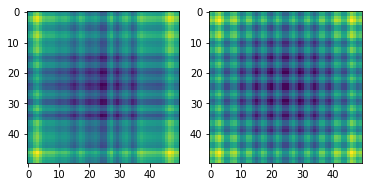

In [34]:
N = 50
x = o.sample_space(N)
z = x.copy()

for i, (l, u) in enumerate(o.range):
    z[:, i] = (z[:, i] - l) / (u - l)

mu, var = m.predict(z)

plt.subplot(121)
plt.imshow(mu.reshape(N, N))

plt.subplot(122)
plt.imshow(o(x).reshape(N, N))

In [35]:
print(np.mean(params, 0))
print(np.std(params, 0))

[0.50886019 0.02575892 0.57054385 0.02305461]
[0. 0. 0. 0.]


In [15]:
m.log_likelihood()

-53.21843877412604

In [16]:
o.optimum

[0, 0]

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


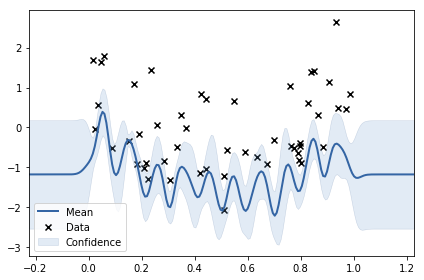

In [17]:
m.plot(fixed_inputs=[(1, .5)])

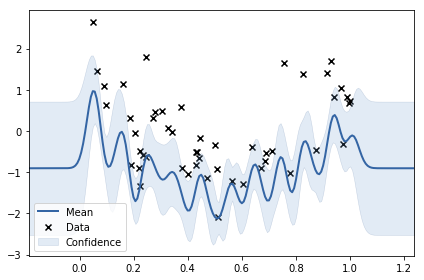

In [18]:
m.plot(fixed_inputs=[(0, .5)])

# Rosenbrock

In [240]:
o = objective.Rosenbrock(d=2)
k = GPy.kern.RBF(2) #+ GPy.kern.RBF(2)
m, params = buildModel(o, k, N=1000, rs=1)

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


In [241]:
print(np.mean(params, 0))
print(np.std(params, 0))

[7.91915469e+05 5.13279559e+00]
[0. 0.]


In [242]:
m.log_likelihood()

7934.208334461779

In [243]:
o.range

[(-2, 2), (-1, 3)]

In [244]:
m.X

ObsAr([[ 0.83594269, -0.78194092],
       [ 0.68754847,  1.71913885],
       [-0.02538477,  0.33323818],
       ...,
       [-0.91784738,  1.14400867],
       [ 0.70510285,  0.02334072],
       [ 0.41313076, -0.47638713]])

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/GPy/likelihoods/gaussian.py:119: RuntimeWarning:invalid value encountered in sqrt


 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


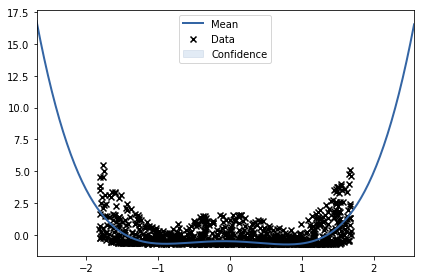

In [245]:
m.plot(fixed_inputs=[(1, 0)])

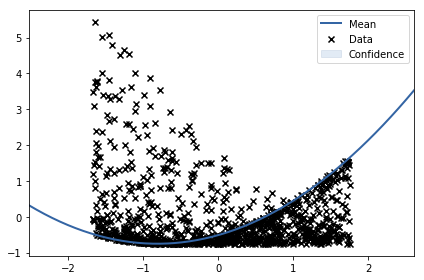

In [246]:
m.plot(fixed_inputs=[(0, 0)])

# six-hump camel 

In [247]:
o = objective.SixHumpCamel(d=2)
k = GPy.kern.RBF(2) # + GPy.kern.RBF(2)
m, params = buildModel(o, k, N=1000, rs=1)

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


In [248]:
print(np.mean(params, 0))
print(np.std(params, 0))

[5.38632071e+05 1.74158139e+00]
[0. 0.]


In [249]:
m.log_likelihood()

7318.633991252256

In [250]:
o.range

[(-2, 2), (-1, 1)]

In [251]:
m.X

ObsAr([[ 0.11313659,  0.68227084],
       [ 1.42632789,  0.26059123],
       [ 0.99025966, -1.62165653],
       ...,
       [ 0.33631365, -0.8649091 ],
       [ 0.6334293 , -0.16184225],
       [ 0.04141158,  1.64702854]])

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/GPy/likelihoods/gaussian.py:119: RuntimeWarning:invalid value encountered in sqrt


 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


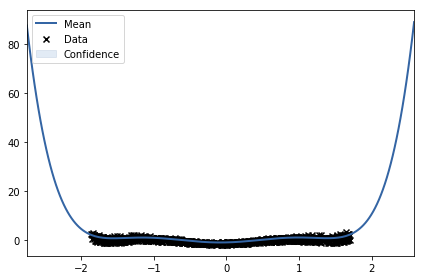

In [252]:
m.plot(fixed_inputs=[(1, 0)])

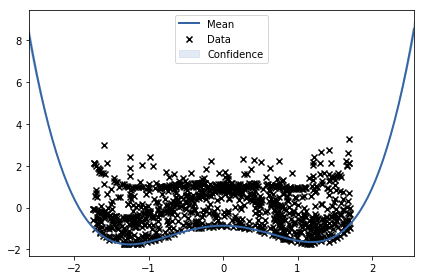

In [253]:
m.plot(fixed_inputs=[(0, 0)])